# COURSE: Generate and visualize data in Python and MATLAB

## SECTION: Spatiotemporal structure using forward models

### https://www.udemy.com/course/suv-data-mxc/?couponCode=201910

### INSTRUCTOR: sincxpress.com


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
from IPython import display
import time
from scipy import stats

---
# VIDEO: Forward model: 2D sheet
---


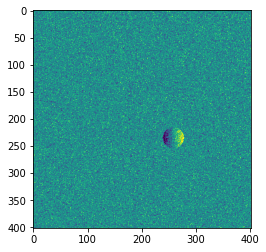

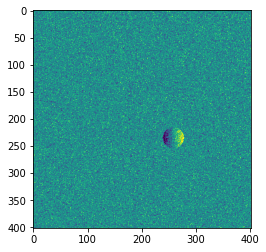

In [2]:
## forward model with one component

# image size
n = 201

# compute sine wave
[x, y] = np.meshgrid(
    stats.zscore(np.arange(-n, n)) - .5,
    stats.zscore(np.arange(-n, n)) - .3)
sinefreq = .015
sine2d = np.sin(2 * np.pi * sinefreq * x)

# create Gaussian
width = .2
gaus2d = np.exp(-(x**2 + y**2) / (2 * width**2))

# point-wise multiply the image and thresholded Gaussian
formod = np.multiply(gaus2d > .7, sine2d)
formod = formod / np.max(formod)

# amplitude modulator
ampmod = abs(np.linspace(-1, 1, n))

# initialize all data
allimgs = np.zeros((n, n * 2, n * 2))

for i in range(n):
  imgtmp = ampmod[i] * formod + np.random.randn(2 * n, 2 * n) / 3
  allimgs[i, :, :] = imgtmp

  # plot
  pl.cla()  # wipe the figure
  plt.imshow(imgtmp, vmin=-1, vmax=1)
  display.clear_output(wait=True)
  display.display(pl.gcf())
  time.sleep(.0001)

---
# VIDEO: Mixed forward models with compression
---


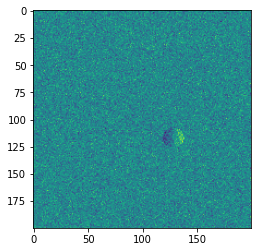

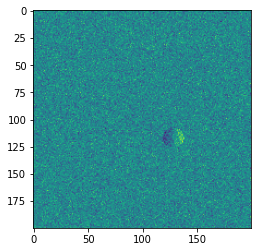

In [3]:
# image size (real image is n*2+1)
n = 100

# compute sine wave
[x, y] = np.meshgrid(
    stats.zscore(np.arange(-n, n)) - .5,
    stats.zscore(np.arange(-n, n)) - .3)
sinefreq = .015
sine2d = np.sin(2 * np.pi * sinefreq * x)

# create Gaussian
width = .2
gaus2d = np.exp(-(x**2 + y**2) / (2 * width**2))

### create one forward model
formod1 = np.multiply(gaus2d > .7, sine2d)
formod1 = formod1 / np.max(formod1)

# create second forward model
cent = [.4, .3]
rsize = [.2, .2]

# define x- and y-values to toggle
xvals = np.arange(int(np.dot(n * 2 + 1, cent[0] - rsize[0] / 2)),
                  int(np.dot(n * 2 + 1, cent[0] + rsize[0] / 2)))
yvals = np.arange(int(np.dot(n * 2 + 1, cent[1] - rsize[1] / 2)),
                  int(np.dot(n * 2 + 1, cent[1] + rsize[1] / 2)))

# initialize empty image
formod2 = np.zeros((2 * n, 2 * n))
# flip the switch
for i in range(0, len(xvals)):
  for j in range(0, len(yvals)):
    formod2[yvals[j], xvals[i]] = 1

### create two amplitude-modulating functions
ampmod1 = abs(np.linspace(-1, 1, n * 4))
ampmod2 = np.sin(np.linspace(0, 30, n * 4)) / 2 + .5

# initialize matrix to save all space-time data
allimgs = np.zeros((n * 4, (n * 2)**2))

for i in range(0, n * 4):
  imgtmp = ampmod1[i] * formod1 + ampmod2[i] * formod2 + np.random.randn(
      2 * n, 2 * n) / 3
  allimgs[i, :] = np.array(imgtmp).ravel() - np.mean(imgtmp)

  # plot
  pl.cla()  # wipe the figure
  plt.imshow(imgtmp)
  display.clear_output(wait=True)
  display.display(pl.gcf())
  time.sleep(.0001)

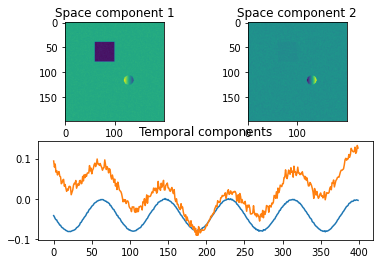

In [4]:
## compression

# SVD (singular value decomposition)
[U, S, V] = np.linalg.svd(allimgs, full_matrices=False)

plt.subplot2grid((2, 2), (0, 0))
plt.imshow(np.reshape(V[0, :], (n * 2, n * 2)))
plt.title('Space component 1')

plt.subplot2grid((2, 2), (0, 1))
plt.imshow(np.reshape(V[1, :], (n * 2, n * 2)))
plt.title('Space component 2')

plt.subplot2grid((2, 1), (1, 0))
plt.plot(U[:, 0])
plt.plot(U[:, 1])
plt.title('Temporal components')

plt.show()